D 차원 **다변수정규분포(MVN: multivariate Gaussian normal distribution)**의 확률밀도함수는 평균벡터 μ 와 공분산행렬 Σ 라는 두 개의 모수를 가지며 다음과 같은 수식으로 정의한다.

$$N(x;μ,Σ)= {1 \over (2\pi)^{D/2}|Σ|^{1/2}} exp(-{1 \over 2}(x-u)^{T}Σ^{-1}(x-u) )$$

이 식에서 각 기호의 의미는 다음과 같다.



$x∈R^D$ 확률변수벡터

$μ∈R^D$  평균벡터

$Σ∈R^{D×D}$ 공분산행렬

다변수정규분포에서 공분산행렬은 양의 정부호인 대칭행렬이어야 한다. 따라서 역행렬이 항상 존재한다. 공분산행렬의 역행렬 $Σ^−1$을 정밀도행렬(precision matrix)이라고 한다.

# 예제

다음과 같은 2차원(D=2) 다변수정규분포를 생각하자. 2차원이므로 확률변수벡터는 

$x=\begin{bmatrix}x1\\x2\\ \end{bmatrix}$

$u=\begin{bmatrix}2\\3\\ \end{bmatrix}$

$Σ=\begin{bmatrix}1&0\\0&1\\ \end{bmatrix}$

$$(x-u)^{T}Σ^{-1}(x-u) = \begin{bmatrix}x_1-2&x_2-3\\ \end{bmatrix}\begin{bmatrix}1&0\\0&1\\ \end{bmatrix} \begin{bmatrix}x_1-2\\x_2-3\\ \end{bmatrix}$$

$$=(x_1-2)^2+(x_2-3)^2$$

$$N(x1,x2)={1 \over 2\pi}exp({-1 \over 2}((x_1-2)^2+(x_2-3)^2))$$

확률밀도함수값이 같은 등고선은 원이 된다.



$$(x_1-2)^2+(x_2-3)^2=r^2$$

사이파이의 stats 서브패키지는 다변수정규분포를 위한 multivariate_normal() 명령을 제공한다. mean 인수로 평균벡터를, cov 인수로 공분산행렬을 받는다. multivariate_normal() 명령으로 위 확률밀도함수를 그리고 랜덤 표본을 생성하면 다음 그림과 같다.

In [10]:
import scipy as sp
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
plt.rc("font", size=10, family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

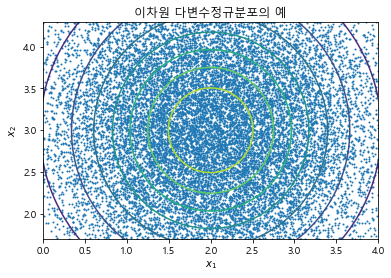

In [11]:
mu = [2, 3]
cov = [[1, 0], [0, 1]]

rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(20000)

xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.xlim(0, 4)
plt.ylim(2, 4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("이차원 다변수정규분포의 예")
plt.show()